#Table of Contents
* [1. Goal](#1.-Goal)
	* [1.1 Initial goal](#1.1-Initial-goal)
	* [1.2 Possibilities](#1.2-Possibilities)
* [2. Usage and examples](#2.-Usage-and-examples)
	* [2.1 Installation](#2.1-Installation)
	* [2.2 A first example:](#2.2-A-first-example:)
	* [2.3 Second example](#2.3-Second-example)
	* [2.4 Third example:](#2.4-Third-example:)
* [3. (post)-Converters](#3.-%28post%29-Converters)
	* [3.1 Installation](#3.1-Installation)
	* [3.2 Conversion to html](#3.2-Conversion-to-html)
	* [3.3 Conversion to LaTeX](#3.3-Conversion-to-LaTeX)
* [4. Disclaimer, sources and thanks](#4.-Disclaimer,-sources-and-thanks)


In [102]:
%%javascript 
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [88]:
%%javascript 
IPython.load_extensions('latex_envs');

<IPython.core.display.Javascript object>

# 1. Goal

## 1.1 Initial goal

The initial goal was only to add an environment `theorem` in my workflow. That is to be able to type something like
\begin{listing}
\begin{theorem} 
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
$$u^Tv = |u||v| \cos \theta,$$ 
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}
\end{listing}
in a markdown cell and have it rendered, like

\begin{theorem}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as $$u^Tv = |u||v| \cos \theta,$$ where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}

## 1.2 Possibilities

The initial project has evolved to account for more environments. We also added some LaTeX commands (e.g. textit, textbf) -- this is useful in the case of copy-paste from a LaTeX document. Labels and references are supported, including for equations. 

**Available environments **

- *property, theorem, lemma, corollary, proposition, definition,remark, problem,           exercise, example*,
- *enumerate, itemize* and an environment *listing*,
- *textboxa*, wich is a `textbox` environment ddefined as a demonstration (see below).

More environments can be added easily in the javascript source file `thmsInNb.js`. Two counters for numbering are implemented: one for theorems' like environments, and the second for exercises' like environments.  


*Limitations:*

- The automatic numbering of environments is updated each time the cell is rendered. One should reload the page to update everything. 
- Environments can be nested. This is not always perfect...

# 2. Usage and examples

## 2.1 Installation

The extension consists in two javascript scripts: `latex_envs.js`, `thmsInNb.js` together with a stylesheet `latex_envs.css`. 
Follow the instructions in the [wiki](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki) to install the extension. You can simply copy these files in the notebook extension directory (usually ~/.ipython/nbextensions) and load the extension in the notebook by 

    %%javascript 
    IPython.load_extensions('latex_envs');

## 2.2 A first example:

This example shows another example of environment, featuring automatic numerotation, and the use of labels and references. Also note that standard markdown can be present in the environment and is interpreted. 
*The rendering is done according to the stylesheet `latex_env.css`, which of course, can be tailored to specific uses and tastes*.  

\begin{listing}
\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}
\end{listing}


\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT2}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}

This is an extremely important tool in signal processing. We put this in evidence using the `textboxa` environment -- which is defined here uin the css, and that one should define in the LaTeX counterpart:
\begin{listing}
\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}
\end{listing}

\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}


As an example, consider the Fourier transform (\ref{eq:FT2}) of a pure cosine wave given by
$$
x[n]= \cos(2\pi k_0 n/N),
$$
where $k_0$ is an integer. Its Fourier transform is given by 
$$
X[k] = \frac{1}{2} \left( \delta[k-k_0] + \delta[k-k_0] \right), 
$$
modulo $N$. This is illustrated in the following simple script:

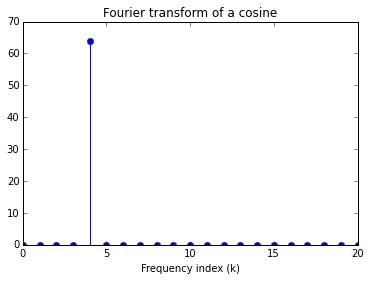

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft
k0=4; N=128; n=np.arange(N); k=np.arange(N)
x=np.sin(2*np.pi*k0*n/N)
X=fft(x)
plt.stem(k,np.abs(X))
plt.xlim([0, 20])
plt.title("Fourier transform of a cosine")
plt.xlabel("Frequency index (k)")

## 2.3 Second example

This example shows a series of environments, with different facets; links, references, markdown or/and LaTeX formatting within environments. Again, the rendering is done according to the stylesheet `latex_env.css`, which can be tailored. 

\begin{listing}
\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
$$
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
$$
\end{definition}

\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}

\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
$$
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
$$
which has finite support. 
\end{proof}

\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}

\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.

\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}

\end{listing}


The lines above are rendered as follows (of course everything can be tailored in the stylesheet):

\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
\begin{equation}
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
\end{equation}
\end{definition}
Properties of the filter are linked to the coefficients of the difference equation. For instance, an immediate property is 

\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}

\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
\begin{equation}
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
\end{equation}
which has finite support. 
\end{proof}


\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}


\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.

\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}



The solution of exercise \ref{ex:exofilter}:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import lfilter
d=np.zeros(100); d[0]=1 #dirac impulse
alist=[0.2, 0.8, 0.9, 0.95, 0.99, 0.999, 1.001, 1.01]
for a in alist:
    h=lfilter([1], [1, -a],d)
    _=plt.plot(h, label="a={}".format(a))
plt.ylim([0,1.5])
plt.xlabel('Time')
_=plt.legend()

## 2.4 Third example:

This example shows that environments like itemize or enumerate are also available. As already indicated, this is useful for copying text from a TeX file. Following the same idea, text formating commands `\textit`, `\textbf`, `\underline`, etc are also available.

\begin{listing}
The following \textit{environments} are available:
\begin{itemize}
    \item \textbf{Theorems and likes}
    \begin{enumerate}
        \item theorem,
        \item lemma,
        \item corollary
        \item ...
    \end{enumerate}
    \item \textbf{exercises}
    \begin{enumerate}
        \item problem,
        \item example,
        \item exercise
    \end{enumerate}
\end{itemize}
\end{listing}

which gives... 

The following \textit{environments} are available:
\begin{itemize}
\item \textbf{Theorems and likes}
\begin{enumerate}
\item theorem,
\item lemma,
\item corollary
\item ...
\end{enumerate}
\item \textbf{exercises}
\begin{enumerate}
\item problem,
\item example,
\item exercise
\end{enumerate}
\end{itemize}

# 3. (post)-Converters

The extension works in the live-notebook. Since it relies on a bunch of javascript, the notebook does not render as is in very nice services such as `nbviewer` or `github` viewer. Similarly, `nbconvert` does not know of the LaTeX constructs which are used and therefore do not fully convert notebooks making use of this extension. Therefore, it is necessary to add a post conversion step to conversions provided by `nbconvert`. Though an interface exists for adding post-converters to nbconvert, this (first) author was too lazy and not enough strong to implement the post conversion along these lines. What has be done are simple `bash` and `python` scripts that perform this conversion.

## 3.1 Installation

Copy the scripts files to a directory in your search path, or launch the scripts with the complete path. The two main scripts are `ipynb_thms_to_html` (conversion to html, of course:) and `ipynb_thms_to_latex`  (conversion to LaTeX!).

## 3.2 Conversion to html

**Requirements**: You will need `perl`, `nodejs`, and `ipython3` (the script calls `ipython3`; if your interpreter is `ipython`, edit the script and replace the different occurences).

The conversion to html is done by something like 

        [path/]ipynb_thms_to_html filename
or a list of files such as

        [path/]ipynb_thms_to_html *.ipynb
In turn, this script makes somes substitutions using `perl`, and then uses the `nodesj` javascript interpreter to make the very same substitutions that are done in the live notebook.
The conversion uses the template `thmsInNb.tpl` (located in the script directory). It also copies the css `latex_env.css` in the directory of the output html file (it must be copied with html files in the case of web upload).

## 3.3 Conversion to LaTeX

**Requirements**: You will need `perl` and `ipython3`. 

The conversion to LaTeX is done by something like 

        [path/]ipynb_thms_to_latex filename
or a list of files such as

        [path/]ipynb_thms_to_latex *.ipynb
        
The script makes some substitutions and cleaning in arkdown cells, then calls the legacy `nbconvert`. Afterward, it runs through the LaTeX environments and converts their contents (which can contain markdown markup) to  LaTeX. Note that the script contains a list of the LaTeX environments to process. In the case of the addition of an environment in the main javascript (`thmsInNb.js`), this list must also be updated. 

Finally, the script removes the header and footer in the LaTeX file. This is a personnal choice, and the corresponding line can be safely commented. 

\begin{example}
As for an example, the present document has been converted using
    
    ipynb_thms_to_latex latex_env_doc.ipynb
    
Then the resulting file (without header/footer) has been included in the main file `documentation.tex`, where some LaTeX definitions of environments are done (namely listings, colors, etc) and compiled using 
    
    xelatex documentation
    
The output can be consulted [here](documentation.pdf).    
\end{example}

# 4. Disclaimer, sources and thanks

This is a not-quick but certainly dirty hack. I am a complete beginner in javascript and of course there are obviously a large amount of possible improvements of the code, in cleaning, factorizing, etc! Language also needs improvement. 

**Contributions will be welcome and deeply appreciated.** 

Originally, I used a piece of code from the nice online markdown editor `stackedit` [https://github.com/benweet/stackedit/issues/187](https://github.com/benweet/stackedit/issues/187), where the authors also considered the problem of incorporating LaTeX markup in their markdown. I also used examples and code from [https://github.com/ipython-contrib/IPython-notebook-extensions](https://github.com/ipython-contrib/IPython-notebook-extensions). 


In [101]:
%%javascript 
IPython.load_extensions('latex_envs');

<IPython.core.display.Javascript object>